In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df= pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [4]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

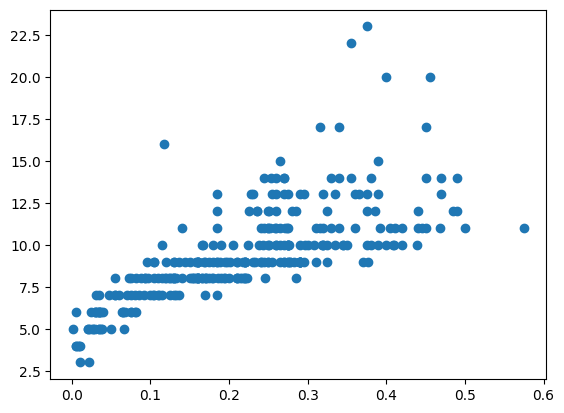

In [5]:
fig,ax= plt.subplots()
ax.scatter(df["Shell weight"][:300],df["Rings"][:300]);

In [6]:
df.Sex.dtype

dtype('O')

In [7]:
df_tmp=df.copy()

In [8]:
df_tmp.head(10)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4
9,9,I,0.565,0.425,0.125,0.6510,0.3795,0.1420,0.1800,8


In [9]:
pd.api.types.is_string_dtype(df_tmp["Sex"])

True

In [10]:
# Turning all of the String values into categorical data
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [46]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             90615 non-null  category
 1   Length          90615 non-null  float64 
 2   Diameter        90615 non-null  float64 
 3   Height          90615 non-null  float64 
 4   Whole weight    90615 non-null  float64 
 5   Whole weight.1  90615 non-null  float64 
 6   Whole weight.2  90615 non-null  float64 
 7   Shell weight    90615 non-null  float64 
 8   Rings           90615 non-null  int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 5.6 MB


In [12]:
df_tmp.drop("id",axis=1,inplace=True)

In [13]:
df_tmp.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [32]:
# Splitting into X and Y
from sklearn.model_selection import train_test_split
X= df_tmp.drop("Rings",axis=1)
y= df_tmp["Rings"]

#Splitting into training and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((72492, 8), (18123, 8), (72492,), (18123,))

In [36]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_test)
    scores={"Training RMSLE":rmsle(y_train,train_preds),
           "Validating RMSLE":rmsle(y_test,val_preds)}
    return scores;

In [37]:
X

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815
90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700


In [51]:
X_train['Sex'] = X_train['Sex'].astype('category')  # Ensure 'Sex' column is categorical

# List of categorical feature names
categorical_feature_names = ['Sex']

# Create the CatBoost Pool objects
train_dataset = cb.Pool(data=X_train, label=y_train, cat_features=categorical_feature_names)
test_dataset = cb.Pool(data=X_test, label=y_test, cat_features=categorical_feature_names)

# Initialize CatBoostRegressor
model = cb.CatBoostRegressor(loss_function='RMSE')

# Train the model using the train_dataset
model.fit(train_dataset, verbose=100)

Learning rate set to 0.080557
0:	learn: 3.0462792	total: 91.7ms	remaining: 1m 31s
100:	learn: 1.8814935	total: 2.44s	remaining: 21.7s
200:	learn: 1.8343330	total: 4.67s	remaining: 18.6s
300:	learn: 1.8042602	total: 7.55s	remaining: 17.5s
400:	learn: 1.7832523	total: 9.72s	remaining: 14.5s
500:	learn: 1.7656130	total: 11.9s	remaining: 11.9s
600:	learn: 1.7503420	total: 14.1s	remaining: 9.35s
700:	learn: 1.7377784	total: 16.2s	remaining: 6.93s
800:	learn: 1.7264728	total: 18.4s	remaining: 4.56s
900:	learn: 1.7155461	total: 20.5s	remaining: 2.26s
999:	learn: 1.7048899	total: 22.7s	remaining: 0us


In [55]:
best_params

{'iterations': 856,
 'learning_rate': 0.03672739631699059,
 'depth': 7,
 'l2_leaf_reg': 0.13983657615219158,
 'border_count': 195}

In [ ]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'thread_count': -1,
        'verbose': False
    }

    # Initialize CatBoostRegressor
    model = CatBoostRegressor(**params)

    # Train the model using the train_dataset
    model.fit(train_dataset, verbose=False)

    # Predict on the test dataset
    y_pred = model.predict(test_dataset)

    # Clip negative values to avoid log(0) or log(negative) errors
    y_pred = np.clip(y_pred, a_min=0, a_max=None)

    # Calculate the evaluation metric (RMSLE)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Create the Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params


[I 2024-04-30 09:07:35,530] A new study created in memory with name: no-name-0574ab52-b2b3-402a-9563-00dd1408175a
[I 2024-04-30 09:07:47,482] Trial 0 finished with value: 0.1578004948727896 and parameters: {'iterations': 238, 'learning_rate': 0.011394906447554054, 'depth': 10, 'l2_leaf_reg': 0.6509291065732528, 'border_count': 222}. Best is trial 0 with value: 0.1578004948727896.
[I 2024-04-30 09:08:38,149] Trial 1 finished with value: 0.16563891005598055 and parameters: {'iterations': 999, 'learning_rate': 0.0018090929820453574, 'depth': 10, 'l2_leaf_reg': 0.0817069387450592, 'border_count': 209}. Best is trial 0 with value: 0.1578004948727896.


In [56]:
pred=model.predict(X_test)

In [57]:
pred

array([11.58233484,  4.83405618,  7.13418951, ...,  9.02113381,
        9.29448781, 14.10400213])

In [58]:
show_scores(model)

{'Training RMSLE': 0.14187303797427955,
 'Validating RMSLE': 0.15055880767607208}

In [60]:
test_df= pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv",low_memory=False)
test_df_tmp=test_df.copy()
test_df_tmp.drop("id",axis=1,inplace=True)
test_df_tmp.head(10)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
5,M,0.560,0.425,0.140,0.8105,0.3525,0.1915,0.2150
6,M,0.635,0.490,0.170,1.1835,0.4605,0.2445,0.3550
7,I,0.340,0.250,0.075,0.1675,0.0750,0.0330,0.0480
8,I,0.485,0.370,0.110,0.5360,0.2565,0.0980,0.1490
9,F,0.640,0.500,0.195,1.3380,0.6470,0.3175,0.3965


In [61]:
for label,content in test_df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex


In [64]:
for label,content in test_df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        test_df_tmp[label]=content.astype("category").cat.as_ordered()
        
test_df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             60411 non-null  category
 1   Length          60411 non-null  float64 
 2   Diameter        60411 non-null  float64 
 3   Height          60411 non-null  float64 
 4   Whole weight    60411 non-null  float64 
 5   Whole weight.1  60411 non-null  float64 
 6   Whole weight.2  60411 non-null  float64 
 7   Shell weight    60411 non-null  float64 
dtypes: category(1), float64(7)
memory usage: 3.3 MB


In [65]:
model.predict(test_df_tmp)

array([ 9.75054897,  9.6977546 , 10.00184951, ..., 12.1956158 ,
       13.83368219,  9.18813124])

In [66]:
len(test_df_tmp)

60411

In [68]:
test_preds=model.predict(test_df_tmp)
test_preds = np.round(test_preds).astype(int)

In [70]:
test_preds

array([10, 10, 10, ..., 12, 14,  9])

In [73]:
df_preds=pd.DataFrame()
df_preds["id"]=test_df["id"]
df_preds["Rings"]=test_preds
df_preds.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,8


In [72]:
from joblib import dump,load
dump(model, filename="CatBoost-Model-1.joblib")

['CatBoost-Model-1.joblib']

In [74]:
df_preds.to_csv("Cat-Boost_Result-1.csv",index=False)